В этом заданиии мы будем использовать данные SOCR по росту и весу 25 тысяч подростков.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (weights_heights.csv, приложенный в задании) в объект Pandas DataFrame:

In [4]:
data=pd.read_csv("weights_heights.csv",index_col="Index")



Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.).

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. Гистограммы удобно строить методом plot Pandas DataFrame с аргументом kind='hist'.

Пример. Построим гистограмму распределения роста подростков из выборки data. Используем метод plot для DataFrame data c аргументами y='Height' (это тот признак, распределение которого мы строим)


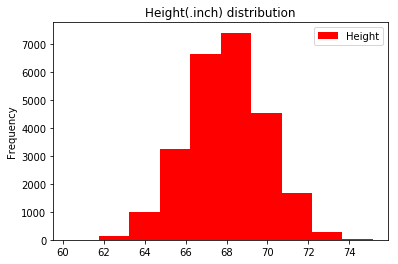

In [5]:
data.plot(y="Height",kind="hist",color="red",title='Height(.inch) distribution')



Аргументы:

    y='Height' - тот признак, распределение которого мы строим
    kind='hist' - означает, что строится гистограмма
    color='red' - цвет

[2]. Посмотрите на первые 5 записей с помощью метода head Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода plot Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.


In [6]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


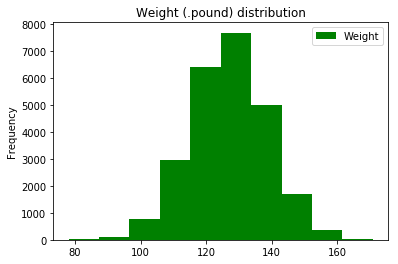

In [7]:
data.plot(y="Weight",kind='hist',color='green',title="Weight (.pound) distribution")

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается m×m графиков (m - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода scatter_matrix

Pandas Data Frame или pairplot библиотеки Seaborn.

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак Индекс массы тела (BMI). Для этого воспользуемся удобной связкой метода apply Pandas DataFrame и lambda-функций Python.

In [8]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [9]:
data["BMI"]=data.apply(lambda row: make_bmi(row["Height"],row["Weight"]),axis=1)

[3]. Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод pairplot библиотеки Seaborn.

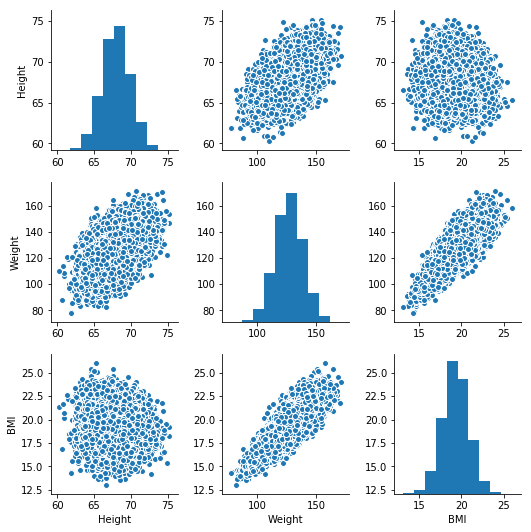

In [10]:
sns.pairplot(data)



Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других.

[4]. Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод boxplot библиотеки Seaborn и метод apply Pandas DataFrame. Подпишите ось y меткой «Рост», ось x – меткой «Весовая категория».


Text(0.5,0,u'Vesovaya categoria')

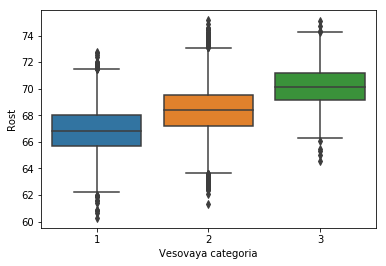

In [12]:
def weight_category(weight):
    pass
    if weight<120:
        return 1
    elif weight>=150:
        return 3
    else:
        return 2
data["weight_cat"]=data["Weight"].apply(weight_category)
sns.boxplot(x="weight_cat",y="Height",data=data)
plt.ylabel("Rost")
plt.xlabel("Vesovaya categoria")

[5]. Постройте scatter plot зависимости роста от веса, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку

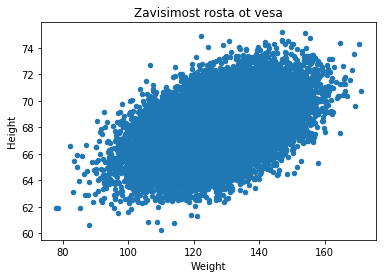

In [13]:
data.plot(y="Height",x="Weight",kind='scatter',title="Zavisimost rosta ot vesa")


Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки.

[6]. Напишите функцию, которая по двум параметрам w0
и w1 вычисляет квадратичную ошибку приближения зависимости роста y от веса x прямой линией y=w0+w1∗x:
error(w0,w1)=∑i=1n(yi−(w0+w1∗xi))2
Здесь n – число наблюдений в наборе данных, yi и xi – рост и вес i-ого человека в наборе данных.

In [14]:
def error(w1,w0,data):
    error=0.0
    for index,row in data.iterrows():
        error+=(row["Height"]-(w0+w1*row["Weight"]))**2
    return error    

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

[7]. Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров (w0,w1)=(60,0.05)
и (w0,w1)=(50,0.16). Используйте метод plot из matplotlib.pyplot, а также метод linspace библиотеки NumPy. Подпишите оси и график.

Text(0.5,1,u'Zavisimost rosta ot vesa i priblishayuchie ee primye')

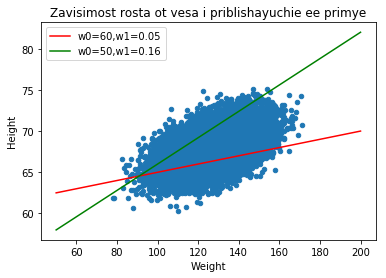

In [28]:
data.plot(y="Height",x="Weight",kind='scatter',title="Zavisimost rosta ot vesa")
x=np.linspace(50,200,100)
plt.plot(x,60+0.05*x,label="w0=60,w1=0.05",color="red")
plt.plot(x,50+0.16*x,label="w0=50,w1=0.16",color="green")
plt.legend()
plt.title("Zavisimost rosta ot vesa i priblishayuchie ee primye")

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

[8]. Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра w1
при w0 = 50. Подпишите оси и график.

Text(0.5,1,u'Grafic zavisimosti funccii oshibki ot parametra w1 pri w0=50')

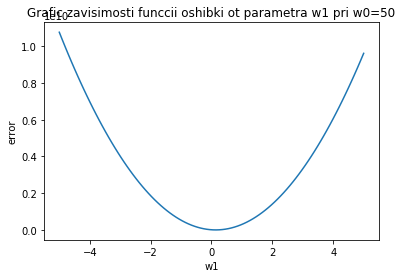

In [16]:
x=np.linspace(-5,5,100)
plt.plot(x,error(x,50,data))
plt.xlabel("w1")
plt.ylabel("error")
plt.title("Grafic zavisimosti funccii oshibki ot parametra w1 pri w0=50")

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте w0=50

.

[9]. С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра w1
в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров (w0, w1) = (50, w1_opt), где w1_opt – найденное в п. 8 оптимальное значение параметра w1.

In [17]:
from scipy.optimize import minimize_scalar
res=minimize_scalar(error,bounds=(-5.0,5.0),args=(50,data),method='bounded')

Text(0.5,1,u'Zavisimost rosta ot vesa i priblishayuchie ee primye')

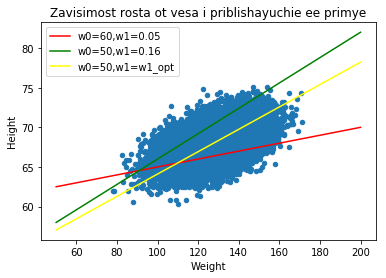

In [27]:
data.plot(y="Height",x="Weight",kind='scatter',title="Zavisimost rosta ot vesa")
x=np.linspace(50,200,100)
plt.plot(x,60+0.05*x,label="w0=60,w1=0.05",color="red")
plt.plot(x,50+0.16*x,label="w0=50,w1=0.16",color="green")
plt.plot(x,50+res.x*x,label="w0=50,w1=w1_opt",color="yellow")
plt.legend()
plt.title("Zavisimost rosta ot vesa i priblishayuchie ee primye")

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме.

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции z(x,y)=sin(x2+y2−−−−−−√)
для значений x и y из интервала [-5,5] c шагом 0.25.

In [19]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и matplotlib.axes._subplots.Axes3DSubplot (ось).

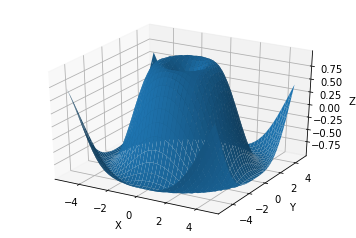

In [20]:
fig=plt.figure()
ax=fig.gca(projection="3d")
X=np.arange(-5,5,0.25)
Y=np.arange(-5,5,0.25)
X,Y=np.meshgrid(X,Y)
Z=np.sin(np.sqrt(X**2+Y**2))
surf=ax.plot_surface(X,Y,Z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

[10]. Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров w0 и w1. Подпишите ось x меткой «Intercept», ось y – меткой «Slope», a ось z – меткой «Error».

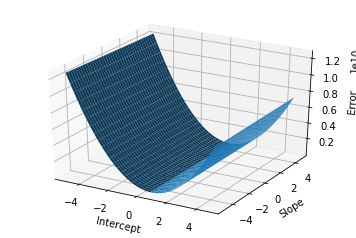

In [22]:
fig=plt.figure()
ax=fig.gca(projection="3d")
X=np.arange(-5,5,0.25)
Y=np.arange(-5,5,0.25)
X,Y=np.meshgrid(X,Y)
Z=error(X,Y,data)
surf=ax.plot_surface(X,Y,Z)
ax.set_xlabel("Intercept")
ax.set_ylabel("Slope")
ax.set_zlabel("Error")
plt.show()

[11]. С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра w0 в диапазоне [-100,100] и w1 - в диапазоне [-5, 5]. Начальная точка – (w0, w1) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров w0 и w1. Подпишите оси и график.

In [23]:
from scipy.optimize import minimize
def vectr_error(w):
    return error(w[1],w[0],data)   

In [24]:
w_opt=minimize(vectr_error,[0.0,0.0],method="L-BFGS-B",bounds=([-100,100],[-5,5]))

      fun: 67545.287085740289
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.01164153,  0.14988473])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([ 57.57175684,   0.08200664])

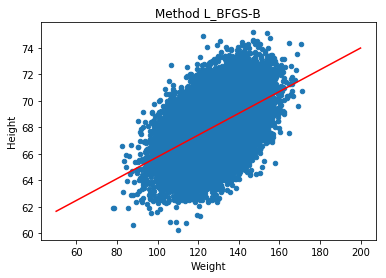

In [29]:
data.plot(y="Height",x="Weight",kind='scatter',title="Method L_BFGS-B")
x=np.linspace(50,200,100)
plt.plot(x,w_opt.x[0]+w_opt.x[1]*x,color="red")